<a href="https://colab.research.google.com/github/Gulwalishah/Collocation-method/blob/main/Collocation_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

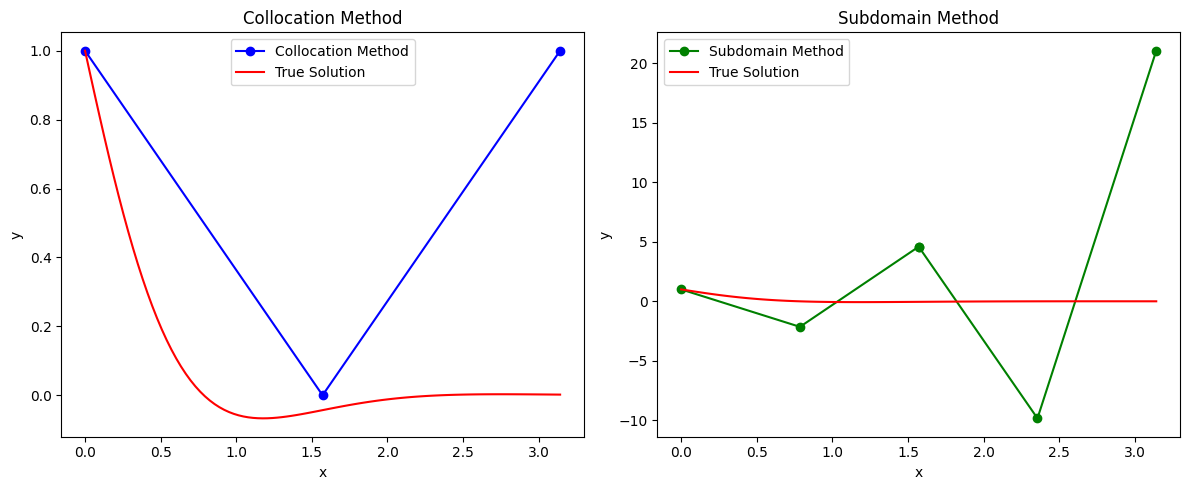

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE function
def ode(x, y):
    return -4 * y

# Collocation Method
def collocation_method():
    # Define the interval [0, pi]
    a, b = 0, np.pi

    # Number of nodes for collocation
    n_nodes = 3

    # Create nodes and step size
    nodes = np.linspace(a, b, n_nodes)
    h = (b - a) / (n_nodes - 1)

    # Initialize solution array
    y_collocation = np.zeros(n_nodes)

    # Boundary conditions
    y_collocation[0] = 1
    y_collocation[-1] = -1

    # Iterate using Euler's method
    for i in range(1, n_nodes - 1):
        y_collocation[i + 1] = y_collocation[i - 1] + 2 * h * ode(nodes[i], y_collocation[i])

    return nodes, y_collocation

# Subdomain Method
def subdomain_method():
    # Define the interval [0, pi]
    a, b = 0, np.pi

    # Number of subdomains
    n_subdomains = 2

    # Create subdomain boundaries
    subdomain_boundaries = np.linspace(a, b, n_subdomains + 1)

    # Initialize solution arrays
    x_subdomain = []
    y_subdomain = []

    # Iterate through subdomains
    for i in range(n_subdomains):
        a_subdomain = subdomain_boundaries[i]
        b_subdomain = subdomain_boundaries[i + 1]

        # Create subdomain nodes and step size
        n_nodes = 3
        nodes = np.linspace(a_subdomain, b_subdomain, n_nodes)
        h = (b_subdomain - a_subdomain) / (n_nodes - 1)

        # Initialize subdomain solution
        y_subdomain_i = np.zeros(n_nodes)

        # Apply boundary conditions within the subdomain
        if i == 0:
            y_subdomain_i[0] = 1
        else:
            y_subdomain_i[0] = y_subdomain[-1][-1]  # Connect subdomains

        # Iterate using Euler's method within the subdomain
        for j in range(1, n_nodes):
            y_subdomain_i[j] = y_subdomain_i[j - 1] + h * ode(nodes[j - 1], y_subdomain_i[j - 1])

        # Store subdomain data
        x_subdomain.append(nodes)
        y_subdomain.append(y_subdomain_i)

    # Combine subdomain solutions into a single array
    nodes_combined = np.concatenate(x_subdomain)
    y_combined = np.concatenate(y_subdomain)

    return nodes_combined, y_combined

# Main part of the script
if __name__ == "__main__":
    # Solve using collocation method
    nodes_collocation, y_collocation = collocation_method()

    # Solve using subdomain method
    nodes_subdomain, y_subdomain = subdomain_method()

    # Create a fine grid for the true solution
    x_true = np.linspace(0, np.pi, 100)
    y_true = np.exp(-2 * x_true) * np.cos(2 * x_true)  # True solution for comparison

    # Create plots to compare the methods
    plt.figure(figsize=(12, 5))

    # Plot collocation method
    plt.subplot(1, 2, 1)
    plt.plot(nodes_collocation, y_collocation, 'bo-', label='Collocation Method')
    plt.plot(x_true, y_true, 'r-', label='True Solution')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Collocation Method')
    plt.legend()

    # Plot subdomain method
    plt.subplot(1, 2, 2)
    plt.plot(nodes_subdomain, y_subdomain, 'go-', label='Subdomain Method')
    plt.plot(x_true, y_true, 'r-', label='True Solution')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Subdomain Method')
    plt.legend()

    plt.tight_layout()
    plt.show()
